# Capstone project for AXEL DE LA TORRE

![Course Hero](images/hero.png)

## Introduction

Describe what is your capstone project about.

## Data Set Selection

Mention the data set you selected for your capstone project, where did you find it, and why it was interesting to you

## Data Examination

Let's start with the imports for the notebook.

Note: Remember to add in the `requirements.txt` file all the modules you use.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests as req

Get the selected data set into a pandas Dataframe.

Note: You need to add the right method to load the data.

In [34]:
url = "https://api.covid19api.com"

response = req.request("GET", url)

print("HTTP Response code:", response)

print(response.json())

HTTP Response code: <Response [200]>
{'countriesRoute': {'Name': 'Get List Of Countries', 'Description': 'Returns all countries and associated provinces. The country_slug variable is used for country specific data', 'Path': '/countries'}, 'countryDayOneRoute': {'Name': 'Get List Of Cases Per Country Per Province By Case Type From The First Recorded Case', 'Description': 'Returns all cases by case type for a country from the first recorded case. Country must be the country_slug from /countries. Cases must be one of: confirmed, recovered, deaths', 'Path': '/dayone/country/:country'}, 'countryDayOneTotalRoute': {'Name': 'Get List Of Cases Per Country By Case Type From The First Recorded Case', 'Description': 'Returns all cases by case type for a country from the first recorded case. Country must be the country_slug from /countries. Cases must be one of: confirmed, recovered, deaths', 'Path': '/total/dayone/country/:country'}, 'countryRoute': {'Name': 'Get List Of Cases Per Country Per Pro

In [35]:
covid_data = pd.read_json("https://api.covid19api.com/dayone/country/mexico/status/confirmed")

covid_data.head(3)

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Mexico,MX,,,,23.63,-102.55,1,confirmed,2020-02-28 00:00:00+00:00
1,Mexico,MX,,,,23.63,-102.55,4,confirmed,2020-02-29 00:00:00+00:00
2,Mexico,MX,,,,23.63,-102.55,5,confirmed,2020-03-01 00:00:00+00:00


Find relevant information about the selected dataset.

- How many rows and columns does it has?
    - 10
- Which characteristics does each column has?
    - Data type
        - Country: string
        - CountryCode: string
        - Province: null
        - City: null
        - CityCode: null
        - Lat: number
        - Lon: number
        - Status: string
        - Date: dame
    - Minimum and maximum values
        - N/A
    - Values distribution
    - Missing data
        - Province
        - City
        - CityCode 
- Which columns are related or are dependent on each other? 
    - Which ones can be derived?
        - Not Really, , we would need to skip some redundant columns
    - Which are good candidates for an hypothesis?
        - Cases
        - Date

Note: Use pandas methods as shape, head, sample, groupby, describe and any other you can think of!

## Define the Hypothesis to test

Decide what is your project about.

What do you want to predict?

`How many Covid cases will occur in mexico based on the historic data in December 2022`

## Clean the data

Create a new Data Frame just with the data you are going to use

In [52]:
df = covid_data[["Cases", "Date"]] 
# How can I display the dates on the plot?
#df = covid_data["Cases"] 

df.head(3)

df.Date.max()

df.describe()

df.info()

df['Date'] = df['Date'].dt.date

df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Cases   899 non-null    int64              
 1   Date    899 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(1)
memory usage: 14.2 KB


/var/folders/x6/cyq5lq_977l_ltlqy1_q283h0000gn/T/ipykernel_7933/201601783.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].dt.date


,Cases,Date
0,1,2020-02-28
1,4,2020-02-29
2,5,2020-03-01


## Run your experiment(s)

Describe what your experiment is done, and execute it.

Note: Be generous with your plots!

## DATA VISUALIZATION
COVID19 evolution 

<AxesSubplot:>

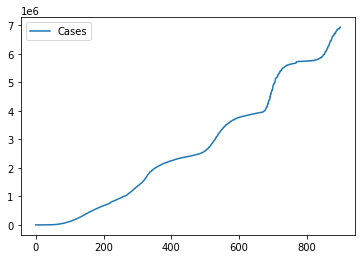

In [53]:
df.plot()

## Reach a conclusion

What was the result of your experiment?

How can it be improved?

Elaborate in one thing you learn during the capstone project.

## Congratulations

You have finished the bootcamp!

![Congratulations](images/congratulations.jpg)